In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Gauss Newton Algorithms

In [4]:
def guass_newton_nonlinear_least(F, D, p0, tol=1e-5, num_epochs=100):
    p = np.zeros([num_epochs, 2])
    p[0] = p0
    for k in range(num_epochs-1):
        tmp = np.linalg.inv(D(p[k]).T.dot(D(p[k])))
        p[k+1] = p[k] - (tmp.dot(D(p[k]).T).dot(F(p[k]))).T
        diff = abs(np.linalg.norm(D(p[k+1])) - np.linalg.norm(D(p[k])))
        if diff < tol:
            print("The number of iteration: {}".format(k + 1))
            break
        
    return p[k+1]

## Min$ y=5e^{3x}$

In [2]:
xn = np.random.rand(100)
a = 3
c = 5
yn_real = 5 * np.exp(3 * xn)
yn = yn_real + np.random.normal(0, 2, 100)
print("The real model: y = {}exp({}x)".format(c, a))

The real model: y = 5exp(3x)


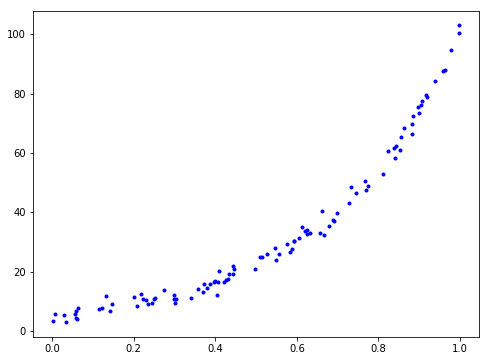

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(xn, yn, "b.")
plt.show()

In [5]:
import sympy
sympy.init_printing()

a, c, x = sympy.symbols("a, c, x")
f_sym = c * sympy.exp(a * x)
f_mat = sympy.Matrix([f_sym])
f_grad_sym = f_mat.jacobian([a, c])

f_lst = []
g_lst = []
for i in range(100):
    fi = yn[i] - f_sym
    fi_mat = sympy.Matrix([fi])
    fi_grad = fi_mat.jacobian([a, c])
    f_lst.append(fi.subs({x: xn[i]}))
    g_lst.append(fi_grad.subs({x: xn[i]}))
    
F_lst = sympy.Matrix(f_lst)
G_lst = sympy.Matrix(g_lst)
F_lamb = sympy.lambdify((a, c), F_lst, 'numpy')
D_lamb = sympy.lambdify((a, c), G_lst, 'numpy')

In [6]:
def func_XY_to_X_Y(f):
    return lambda X: np.array(f(X[0], X[1]))

In [7]:
F = func_XY_to_X_Y(F_lamb)
D = func_XY_to_X_Y(D_lamb)

In [8]:
opts = guass_newton_nonlinear_least(F, D, np.array([10, 20]))
print("The optimal value: a={:.2f}, c={:.2f}".format(opts[0], opts[1]))

The number of iteration: 14
The optimal value: a=3.02, c=4.89


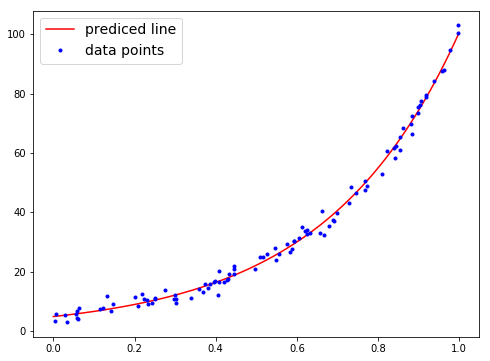

In [9]:
xs = np.linspace(0, 1, 100)
ys = opts[1] * np.exp(opts[0] * xs)
plt.figure(figsize=(8, 6))
plt.plot(xs, ys, c="red", label="prediced line")
plt.plot(xn, yn, "b.", label="data points")
plt.legend(fontsize=14)
plt.show()